In [11]:
# 1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
# 2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
# 3. so_survey_2022.pdf - PDF file of the survey instrument
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

devs_data = pd.read_csv('./survey_results_public.csv')
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

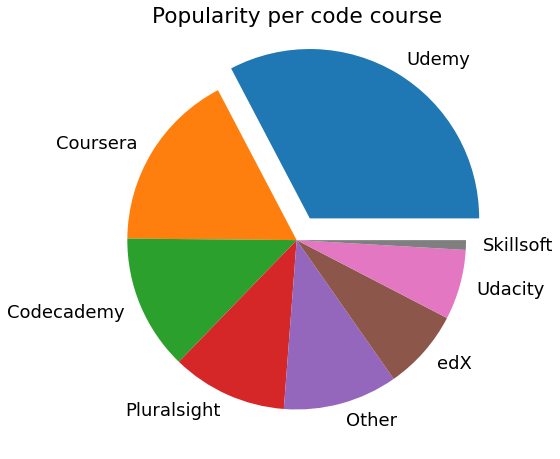

In [12]:
# Popularity per code course
courses = devs_data['LearnCodeCoursesCert'].dropna() # Cleaning Data

lang_counter = Counter()

for response in courses:
    lang_counter.update(response.split(';')) # {course:quantity}

course = [] # Array of courses
popu = [] # Array of popularity

for lang,popularity in lang_counter.most_common(15):
    course.append(lang)
    popu.append(popularity)

explode = [0 for _ in popu][:-1]
explode.insert(popu.index(max(popu)),0.15) # Emphasis on the highest

plt.rcParams['font.size'] = 18

plt.figure(figsize=(6, 6))
plt.title('Popularity per code course')
plt.pie(popu,labels=course,explode=explode)
plt.show()

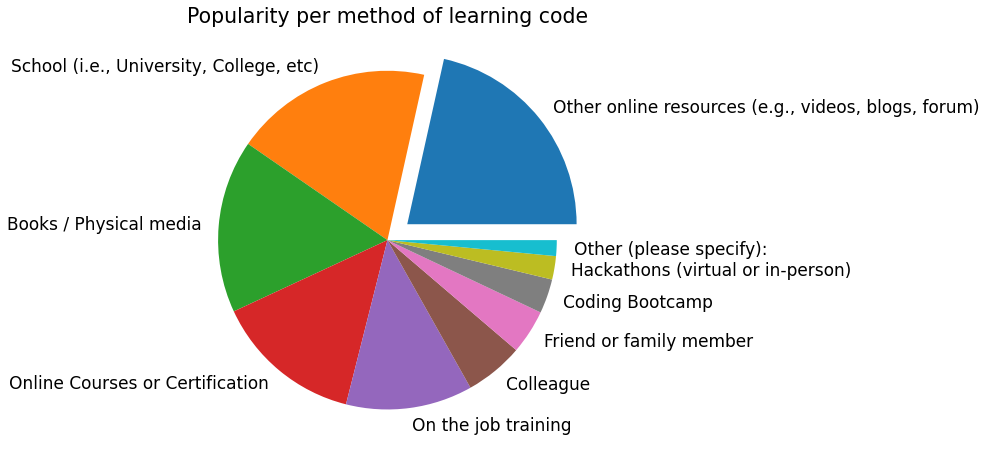

In [13]:
# Popularity per method of learning code
courses = devs_data['LearnCode'].dropna() # Cleaning Data

lang_counter = Counter()

for response in courses:
    lang_counter.update(response.split(';')) # {course:quantity}

course = [] # Array of courses
popu = [] # Array of popularity

for lang,popularity in lang_counter.most_common(20):
    course.append(lang)
    popu.append(popularity)

explode = [0 for _ in popu][:-1]
explode.insert(popu.index(max(popu)),0.15) # Emphasis on the highest

plt.rcParams['font.size'] = 17

plt.figure(figsize=(6, 6))
plt.title('Popularity per method of learning code')
plt.pie(popu,labels=course,explode=explode)
plt.show()

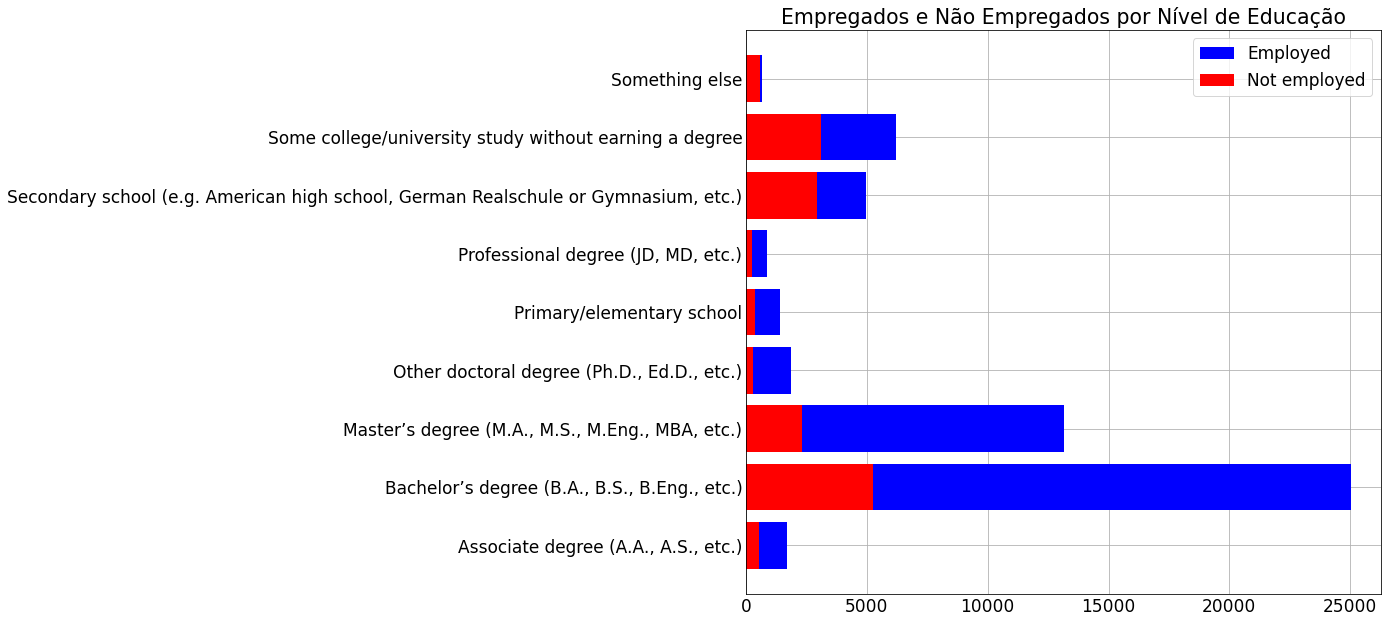

In [14]:
# Employed x Not employed based on education level

plt.style.use('_mpl-gallery')

edlvl = devs_data.groupby(by='EdLevel') # Series grouped by EdLevel

employment_data = edlvl['Employment'].apply(lambda x: x.str.contains('Employed').value_counts())

employed = employment_data.values[::2]

not_employed = employment_data.values[1::2]

names = devs_data['EdLevel'].dropna().unique() # Names of EdLevel
sorted_names = np.sort(names)

y_axis = range(len(sorted_names))

plt.figure(figsize=(9, 8))
plt.xticks(color='black')
plt.yticks(y_axis, sorted_names,color='black')
plt.barh(y_axis, employed,color='blue',label='Employed')
plt.barh(y_axis, not_employed,color='red',label='Not employed')
plt.legend(labelcolor='black')
plt.title("Empregados e Não Empregados por Nível de Educação",color='black')
plt.show()

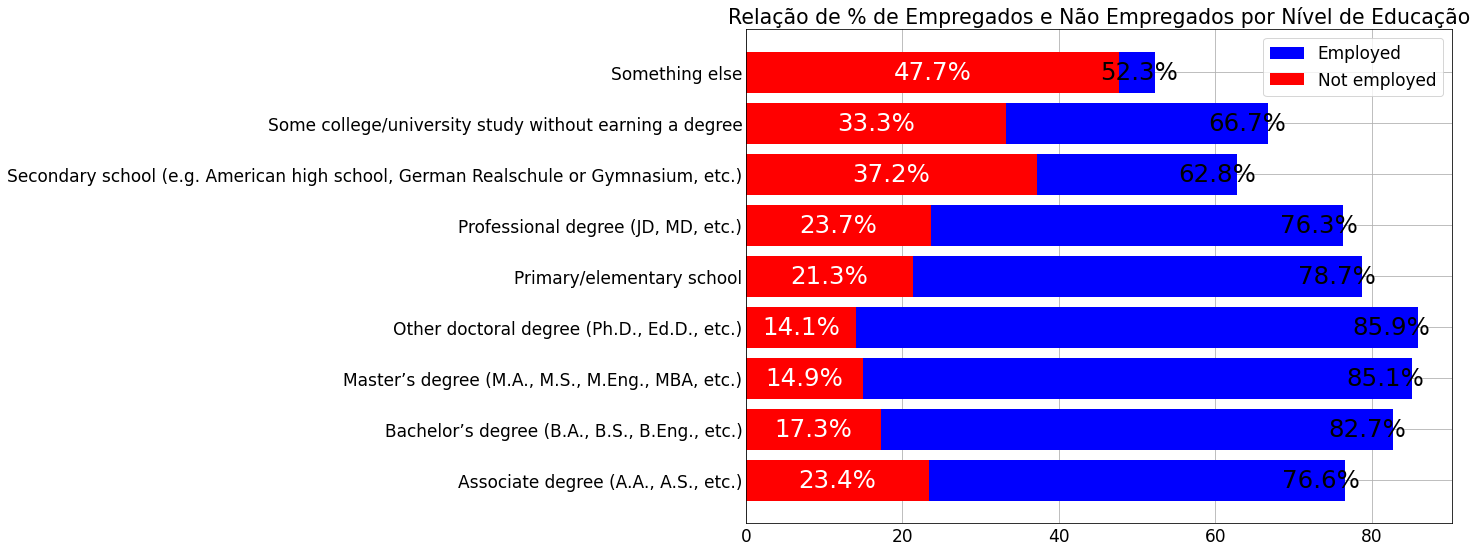

In [15]:
# % of Employed x % of Not employed based on education level

normalized_employment_data = edlvl['Employment'].apply(lambda x: round(x.str.contains('Employed').value_counts(normalize=True) * 100,1)) # In %

not_employed_normalized = normalized_employment_data.values[1::2]
employed_normalized = normalized_employment_data.values[::2]

plt.figure(figsize=(10, 7))

for x,y in enumerate(not_employed_normalized):
    plt.text(x=y/2,y=x,s=f'{y}%',ha='center', va='center',size='x-large',c='#ffffff') # % inside the horizontal bar
    
for x,y in enumerate(employed_normalized):
    plt.text(x=y*0.96,y=x,s=f'{y}%',ha='center', va='center',size='x-large',c='#000000') # % inside the horizontal bar

plt.yticks(y_axis, sorted_names,color='black')
plt.xticks(color='black')
plt.barh(y_axis,employed_normalized,label='Employed',color='blue')
plt.barh(y_axis,not_employed_normalized,label='Not employed',color='red')
plt.legend(labelcolor='black')
plt.title("Relação de % de Empregados e Não Empregados por Nível de Educação",color='black')
plt.show()